Presentacion IASS - Codigo - 2020

# Gradiente Descendente: comparando Rendimientos


## Crear los datos

In [ ]:
#importar los modulos necesarios
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression


#funcion que mide el tiempo las diferentes llamadas a la funcion "method".
#en tecnico rigor esta funcion existe con el magic command "timeit"
#Ver referencia 1
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed



In [ ]:
#creamos datos artificiales
X, y = make_regression(n_samples = 10000, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2019)

print("X = ", X.shape, "\ny =", y.shape)

X =  (10000, 1) 
y = (10000,)


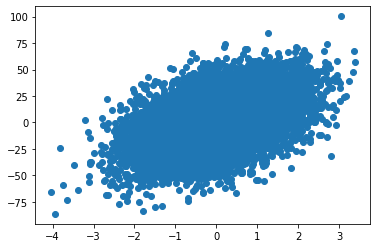

In [ ]:
#ver los puntitos
plt.scatter(X,y)

In [ ]:
#regresion lineal 
x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y) #Calcular una regresion lineal de minimos cuadrados para dos set de mediciones
print ("Pendiente =", slope, "\nintercepto =",intercept) 

Pendiente = 10.650659469662918 
intercepto = 0.2873381752645907


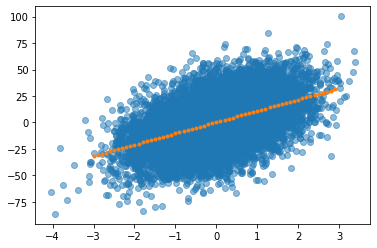

In [ ]:
#graficamos la regresion lineal anterior
best_fit = np.vectorize(lambda x: x * slope + intercept) #un iterador para graficar la recta
plt.plot(x, y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

In [ ]:
y = y.reshape(-1,1) #dejo y en forma de vector
print(y.shape)

(10000, 1)


 Idea: Probar los 3 algoritmos basicos de Gradiente descendente.
 Nota: la funcion de costo de la regresion lineal $J(\theta_0, \theta_1$) es convexa.

 ## Gradiente Descendente (Lote/Batch)

\begin{align*}
y_{pred} = X \cdot \theta  \\
\text{cost} = J(\theta_1, \theta_2) = \frac{1}{2 m} \sum (y_{pred} - y)^{2}
\end{align*}


In [ ]:
#costo de llegar a la solucion
def cal_cost(theta,X,y):
    m = len(y) #cantidad de datos = m
    predictions = X.dot(theta) #<X,theta>
    cost = (1/2*m) * np.sum(np.square(predictions-y)) #modelo de regresion lineal J(theta1, theta2)
    return cost

In [ ]:
np.zeros(100).shape

(100,)

\begin{align*}
  y_{pred} = X \cdot \theta \\
  \theta = \theta - \frac{1}{m}  \eta  ( X^{T} \cdot (y_{pred}-y))
\end{align*}

In [ ]:
@timeit
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)                                   #mi numero de ejemplos sera m, como en las ecuaciones
    cost_history = np.zeros(iterations)          # matriz de ceros tam 100
    theta_history = np.zeros((iterations, 2))    #matriz de ceros de tam 100x2 
    for it in range(iterations):                 # it va del del 0 al iterations, repito este proceso iterations veces 
        prediction = np.dot(X, theta)            #<X, theta>
        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y))) #actualizacion de parametros
        theta_history[it, :] = theta.T                                        #theta[it] = [theta1, theta2]^T
        cost_history[it] = cal_cost(theta, X, y)                              #guardamos el costo de tiempo - Ignorar
    return theta, cost_history, theta_history

#aqui estoy calculando el theta con todos los valores de m de una vez

In [ ]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)        
X_b = np.c_[np.ones((len(X), 1)), X]  

#introducimos:
#theta inicial al azar, 2x1
#matriz de 10000x2, concatenadas entre muchos 10000 en la primera y los valores de X en la segunda
#el paso de lr=0.05
#n_inter = iterations = 1000
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

'gradient_descent'  120.22 ms
Theta0: 0.287,
Theta1:10.651
Final cost/MSE:  19910372815.825


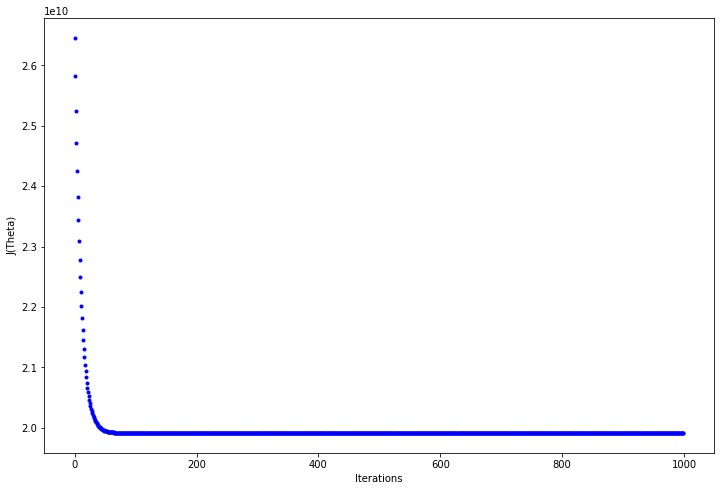

In [ ]:
#ploteo de lo anterior
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

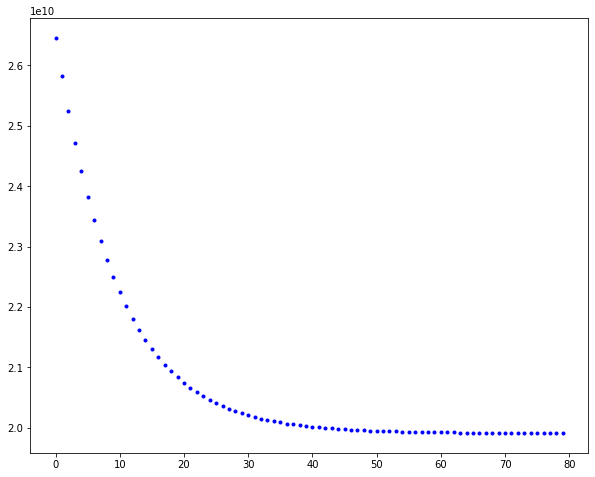

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(80),cost_history[:80],'b.')

## Gradiente Descendiente Estocastico

\begin{align*}
\text{cost} = J(\theta_1, \theta_2) = \frac{1}{2 m} \sum (y_{pred} - y)^{2}
\end{align*}
Para la prediccion tenemos:
\begin{align*}
y_{pred} = x_i \cdot \theta \\
\theta = \theta - \frac{1}{m}  \eta  ( x_i^{T} \cdot (y_{pred}-y))
\end{align*}

In [ ]:
@timeit
def stocashtic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    m = len(y)                                             #mi numero de ejemplos sera m, como el las ecuaciones
    cost_history = np.zeros(iterations)
    for it in range(iterations):                           #repito este proceso iterations veces
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)             #entero aleatorio entre 0 y m
            X_i = X[rand_ind, :].reshape(1, X.shape[1])    #(1x2) 1, valor de X tomado al azar
            y_i = y[rand_ind].reshape(1, 1)                #(1x1) valor de y tomado al azar
            prediction = np.dot(X_i, theta)
            theta = theta - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i))) #actualizo el peso theta
            cost += cal_cost(theta, X_i, y_i)              #calculo del costo en tiempo - ignorar
        cost_history[it] = cost                            #luego de terminar un ciclo m, guardamos el costo en tiempo - ignorar
    return theta, cost_history

    #aqui estoy actualizando el peso altiro, cuando calculo aleatoriamente hacia donde avanzar

In [ ]:
X[3, :]

array([1.09533049])

In [ ]:
# 1000 iteraciones con un paso de 0.05
# cuidado, el calculo del costo de tiempo dura mucho aca


lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))



'stocashtic_gradient_descent'  200662.31 ms
Theta0: 0.276,
Theta1:10.663
Final cost/MSE:  2000359.890


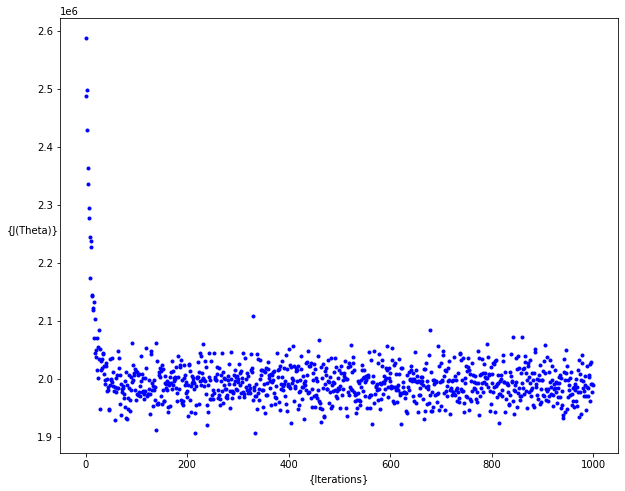

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")

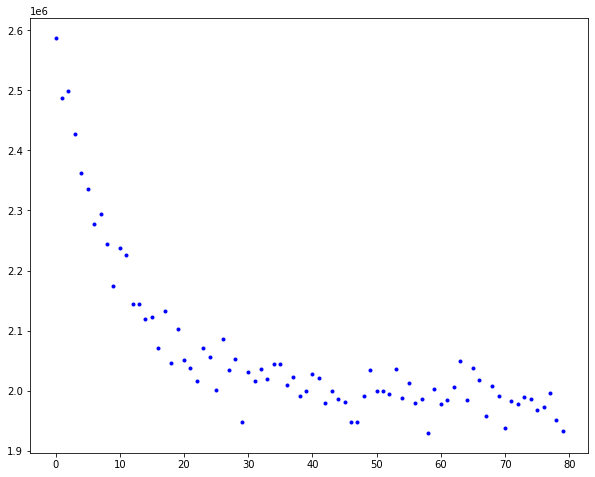

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(80),cost_history[:80],'b.')

## Gradiente Descendente por mini-lotes (Mini-Batch)

Hacemos lo mismo que en GD ppr batch, pero subdividimos los tramos.

In [ ]:
@timeit
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01, iterations=10, batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)           #set el numero de batchs
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)  #tamaño=(m,) - Numeros entre 1 y m ubicados al azar, sin repetirse
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]            #subdivision de x
            y_i = y[i:i+batch_size]            #subdivision de y
            X_i = np.c_[np.ones(len(X_i)),X_i] #concatenar 1s con Xs valores
            prediction = np.dot(X_i,theta)     #misma operacion que con batch
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i))) #misma operacion que en batch
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
    return theta, cost_history



In [ ]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

'minibatch_gradient_descent'  22467.79 ms
Theta0:          0.287,
Theta1:          10.650
Final cost/MSE:  39820336.822


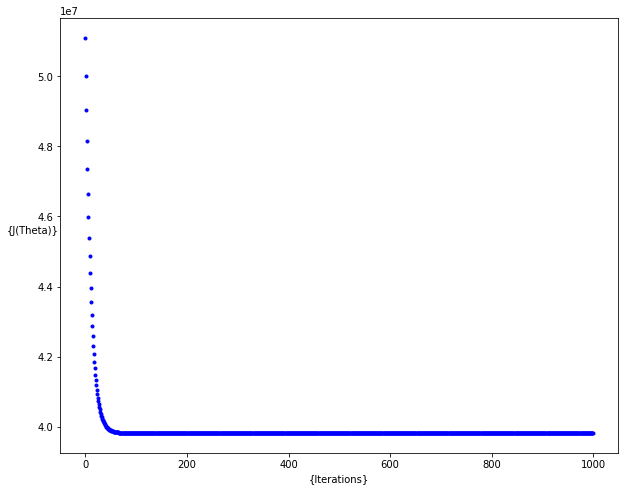

In [ ]:


fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")



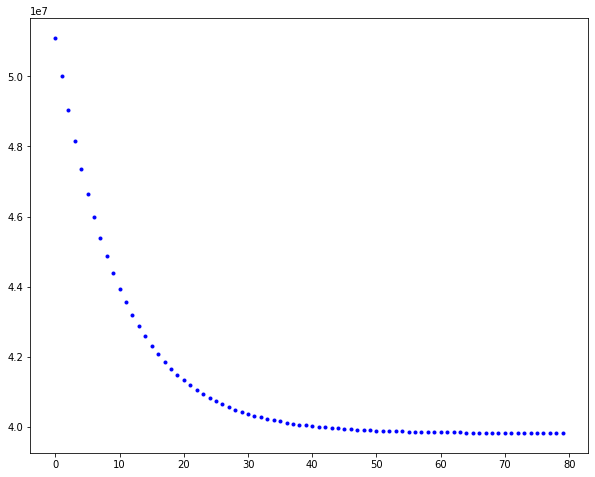

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(80),cost_history[:80],'b.')

**texto en negrita**## Referencias:

(1) Codigo Principal de Gradiente Descendente y su Comparacion https://www.youtube.com/watch?v=Ne3hjpP7KSI

(2) Gradiente Descendente (en espanol) https://www.youtube.com/watch?v=m3vd3vi6a_s&t=41s

(3) SVD https://www.youtube.com/watch?v=7wBeXw4hIEg&t=955s

(4) Relacion Bias-Varianza en ML https://www.youtube.com/watch?v=V6lWLUGSPf4

(5) GD de stanford https://www.youtube.com/watch?v=SD5568NXr78

(6) SVM: Funcion de costo no explicada: https://www.youtube.com/watch?v=jbluHIgBmBo

(7) PDF para ver Np es aplastantemente mejor : https://www.nature.com/articles/s41586-020-2649-2

# SVM con Python

##Primera seccion: Introduccion

Introduccion: Comenzamos importando las librerias clasicas.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Generamos un conjunto de ejemplos, gracias a la funcion make_blobs.

(50,)
(50,)


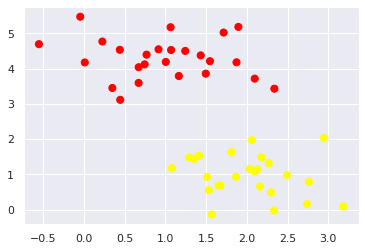

In [ ]:
#ver referencia 2
from sklearn.datasets.samples_generator import make_blobs

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

print( X[:, 0].shape)
print( X[:, 1].shape)

Muchas lineas posibles que parecen dividir los datos correctamente no. ¿Cual es mejor?

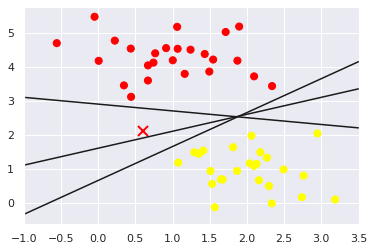

In [ ]:
#ver referencia 2
xfit = np.linspace(-1, 3.5) #50 numeros equiespaciados
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

#aqui realizamos un plot de 3 lineas tentativas
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

#un punto x muy peligroso de clasificar
plt.xlim(-1, 3.5);

#print(xfit)

El punto marcado puede quedar clasificado de distinta manera en la medida que 
la recta divisora se defina distinto.

Note que $C = \infty$ implica margen optimo muy estrecho (podria causar sobreajuste)

Kernel lineal = $K(x_i,x_j) =x_{i}^{T} x_j$

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) #C = muy grande, kernel=lineal
model.fit(X, y) 

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Notas del algoritmo anterior:
- kernel: Especifica el tipo de núcleo que se utilizará en el algoritmo. Puede ser 'lineal', 'poly', 'rbf', 'sigmoid', 'precalculado', o un llamable. El valor por defecto es 'rbf'.
- Gamma: Es el coeficiente del núcleo para "rbf", "poly" y "sigmoid". Si gamma es 'auto', entonces se usará 1/n_características en su lugar. Es un parámetro para los hiperplanos no lineales. Cuanto más alto es el valor gamma que intenta encajar exactamente en el conjunto de datos de entrenamiento.

Recomiendo muchisimo la referencia (11) para entender que es cada parametro
en la funcion SVC.

Para visualizar mejor lo que está sucediendo aquí, vamos a crear una función que trazará los límites de decisión del SVM.

In [ ]:
#Robo: ver referencia 1.
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #gca = Get the current axes, creating one if necessary.
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30) #30 sampleos
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Ahora realizaremos un plot con la funcion anterior.
Esta es la línea divisoria que maximiza el margen entre los dos conjuntos de puntos. Algunos de los puntos de entrenamiento tocan el margen. Estos puntos son los elementos centrales de este ajuste, y se conocen como los vectores de apoyo (support vectors), y dan al algoritmo su nombre. En sklearn.svm, la valor de estos puntos se almacenan en el atributo support_vectors_ del clasificador.

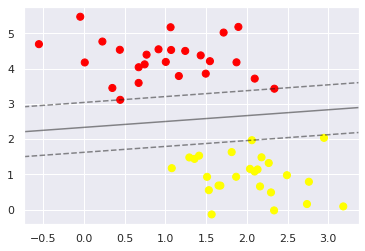

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Mostrando donde se guardan los support vectors $v_{sv}$, segun la notacion que ya hemos usado : (Puntos 2-D)

In [ ]:
model.support_vectors_ 

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Para el ajuste sólo importa la posición de los vectores de apoyo; los puntos más alejados del margen que están en el lado correcto no modifican el ajuste. Técnicamente, esto se debe a que estos puntos no contribuyen a la función de pérdida utilizada para el ajuste del modelo, por lo que su posición y número no importan mientras no crucen el margen.

Podemos ver esto, por ejemplo, si trazamos el modelo aprendido de los primeros 60 puntos y los primeros 120 puntos de este conjunto de datos:


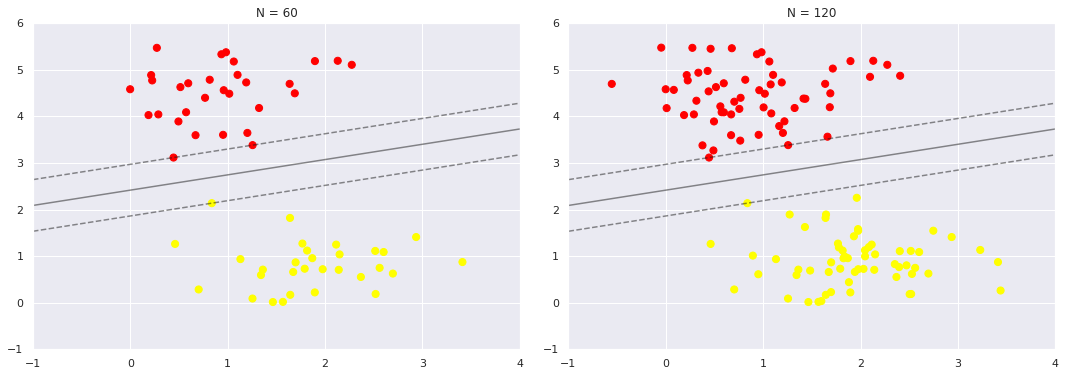

In [ ]:
#Ver referencia (2)
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N] #guardar x_i
    y = y[:N] #guardar y_i
    model = SVC(kernel='linear', C=1E10) #SVC lineal con C->oo
    model.fit(X, y)
    
    #gca obtiene/crea ejes
    ax = ax or plt.gca()

    #Un gráfico de dispersión de y con respecto a x con un tamaño 
    # y/o color de marcador variable.
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)

    #funcion creada arriba para lograr 
    plot_svc_decision_function(model, ax) 

fig, ax = plt.subplots(1, 2, figsize=(16, 6)) #dim 2 plots
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) #distancia

#selector posible entre los N, con esto se juega para mostrar
# la variabilidad de la cantidad de datos.
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

En el panel izquierdo, vemos el modelo y los vectores de apoyo para 60 puntos de entrenamiento. En el panel derecho, se duplico el número de puntos, pero el modelo no ha cambiado: los tres vectores de apoyo del panel izquierdo siguen siendo los vectores de apoyo del panel derecho. Esta insensibilidad al comportamiento exacto de los puntos distantes es uno de los puntos fuertes del modelo SVM.

In [ ]:
#robo: ver referencia (1)
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100, 200), value=10), Output()), _dom_classes=('w…

Donde el SVM se vuelve extremadamente poderoso es cuando se combina con los kernels. 
Para motivar la necesidad de los núcleos, veamos algunos datos que no son linealmente separables:

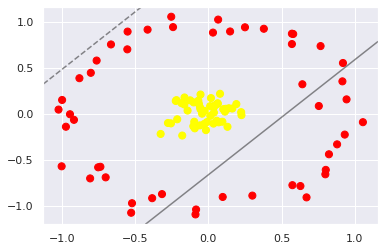

In [ ]:
from sklearn.datasets.samples_generator import make_circles

#crear datos, esta vez en circulo.
X, y = make_circles(100, factor=.1, noise=.1) 

#seteo de SVC y entrenamiento
clf = SVC(kernel='linear').fit(X, y)

#plot de lo anterior
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Está claro que ninguna discriminación lineal podrá nunca separar estos datos. Podríamos proyectar los datos en una dimensión superior de tal manera que un separador lineal sería suficiente. Por ejemplo, una proyección simple que podríamos utilizar sería para calcular una función base radial centrada en el grupo medio:

In [ ]:
#ver referencia (2)
#aplicado a el vector X la exponencial
r = np.exp( -(X ** 2).sum(1) )

Podemos visualizar esta dimensión de datos extra usando un gráfico tridimensional:

In [ ]:
#esto no me salio tan bien, esperaba ver el plano 
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

En sklearn.svm, podemos aplicar la SVM del núcleo simplemente cambiando nuestro núcleo lineal a un núcleo RBF (función de base radial), usando el hiperparámetro del modelo del núcleo:

In [ ]:
#kernel usado de funcion radial, veala en:
#https://en.wikipedia.org/wiki/Radial_basis_function_kernel
clf = SVC(kernel='rbf', C=1E6) #modelo rbf
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

"Magicamente", con la correcta seleccion del kernel adecuado logramos una muchisima mejor separacion de los datos. 

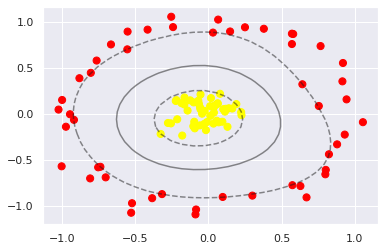

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Usando esta SVM con kernel, el algoritmo aprendende un límite de decisión no lineal adecuado. Esta estrategia de transformación del núcleo se utiliza a menudo en el aprendizaje de la máquina para convertir métodos lineales en métodos no lineales, especialmente para modelos en los que se puede utilizar el truco del kernel.

Que pasa si el limite es mucho mas difuso?

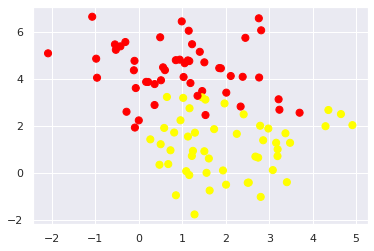

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Para manejar este caso, la implementación del SVM tiene un pequeño factor $\epsilon$ que "suaviza" el margen: es decir, permite que algunos de los puntos se arrastren dentro del margen si eso permite un mejor ajuste. La dureza del margen está controlada por un parámetro de regularizacion, más a menudo conocido como C. Para un C muy grande, el margen es ""duro"", y los puntos no pueden estar en él. Para un C más pequeño, el margen es más suave, y puede crecer hasta abarcar algunos puntos (o todo los puntos).

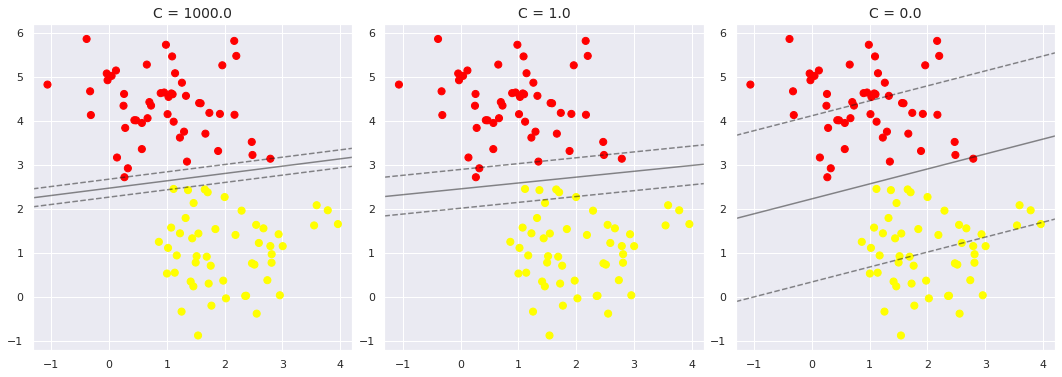

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#Ver referencia (2). Zip es un "iterador", como los de c++
for axi, C in zip(ax, [1000.0, 1.0, 0.01]): #agrege los que quiere pero en formato float
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

El valor optimo de el parametro C depende de los datos. Puede usarse
cross-validation o un procedimiento similar para encontrarle. (escapa de esto)

## Otros ejemplos con Kernels no lineales (extras)

Librerias

In [ ]:
#Ver referencia (1)
#Previos
import sys
assert sys.version_info >= (3, 5) #corroborar version necesaria

# Se requiere Scikit-Learn ≥0.20 
import sklearn
assert sklearn.__version__ >= "0.20" #corroborar version necesaria

# Importar comunes
import numpy as np
import os

# Para hacer plots bonitos y controlar tamaños
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Un generador de datos simple es make_moons. Bien descrito en:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

X= (100, 2)  y= (100,)
X_0= (100,)  X_1= (50,)  X_2= (50,)


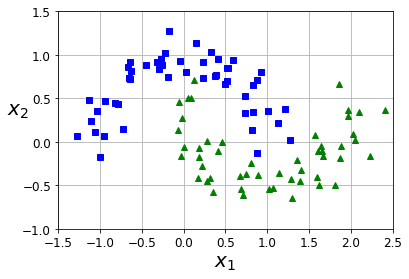

In [ ]:
from sklearn.datasets import make_moons

#Un simple generador de datos de juguete 
# para visualizar los algoritmos de agrupación y clasificación
#X = 100,2  y = 100,1
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

#para ver lo que cree
print("X=",X.shape, " y=", y.shape)
print("X_0=",X[:, 0].shape, " X_1=", X[:,0][y==0].shape, " X_2=", X[:,0][y==1].shape)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") #triangulos verdes, solo los puntos con clasificacion = 0
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # cuadrados azules, solo los puntos con clasificacion = 1
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

# Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html pipeline es denso
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

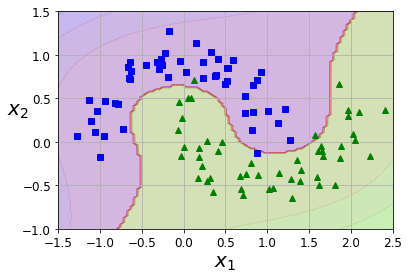

In [ ]:
#ver referencia 1
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

\textbf{coef0}:
parámetro de la "proyección" del núcleo, que puede ser utilizado para superar uno de los problemas importantes con el núcleo polinomio. En general, el simple hecho de usar coef0=0 debería estar bien, pero el núcleo polinómico tiene un problema, con p->inf, separa cada vez más pares de puntos, para los cuales <x,y> es menor que 1 y <a,b> con un valor mayor. Esto se debe a que las potencias de los valores menores que uno se acercan cada vez más a 0, mientras que la misma potencia de valor mayor que uno crece hasta el infinito. Puedes usar coef0 para "escalar" tus datos de modo que no haya tal distinción - puedes añadir 1-min <x,y>, de modo que ningún valor sea menor que 1 . Si realmente sientes la necesidad de afinar este parámetro, te sugiero que busques en el rango de $[min(1-min , 0),max(<x,y>)]$, donde max se calcula a través de todo el conjunto de entrenamiento.


In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

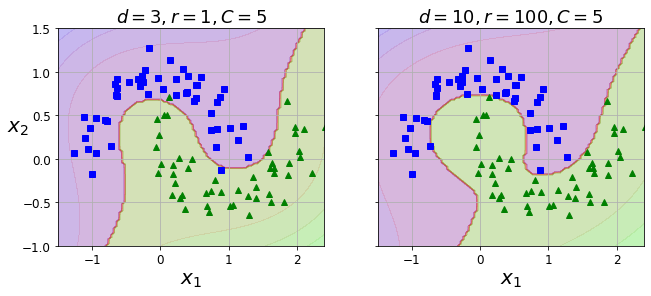

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

Ver referencia (2). Esto es solo cuatiqueria para visualizar como el kernel 
se mapean los puntos en el nuevo espacio luego de aplicar la
transformacióón.

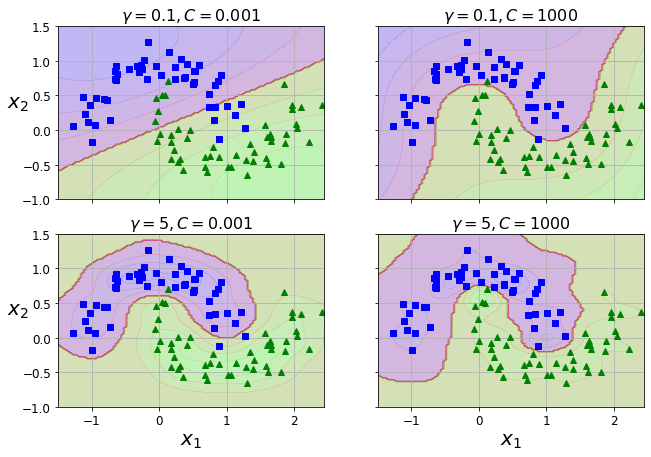

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# PCA

##Intro de PCA

En primer lugar importamos:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

PCA es un método flexible, no supervisado, para la reducción de la dimensionalidad de los datos. Su comportamiento es más fácil de visualizar mirando un conjunto de datos bidimensionales. Creamos los siguientes 200 puntos:

var (2, 2)
datos (2, 200)
Dim(X) (200, 2)


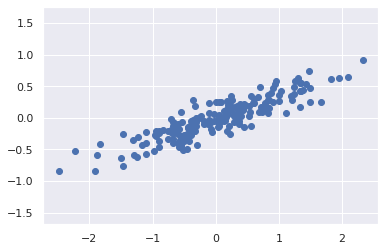

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
print("var", rng.rand(2, 2).shape)
print("datos", rng.randn(2, 200).shape)
print("Dim(X)", X.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Al ojelio, podemos ver que la relacion es lineal, y esperamos extraer la informacion de las componentes. Aqui buscamos la relacion entre $x$ y de $y$ (a diferencia de intentar predecir y con los valores de x)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

print("Informacion: \n", pca.components_)

print(pca.explained_variance_)

Informacion: 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


El uso del PCA para la reducción de la dimensionalidad implica la reducción a cero de uno o más de los componentes principales más pequeños, lo que resulta en una proyección de menor dimensión de los datos que preserva la máxima variabilidad de los datos.

In [4]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("tamaño original:   ", X.shape)
print("tamaño luego de la transformacion:", X_pca.shape)

tamaño original:    (200, 2)
tamaño luego de la transformacion: (200, 1)


Los datos transformados se han reducido a una sola dimensión.
Para entender el efecto de esta reducción de la dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y graficarlos junto con los datos originales:

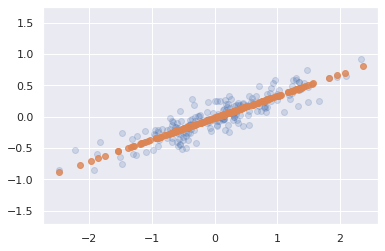

In [5]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Puntos naranja: reduccion.
Esto deja claro lo que significa reducir la dimensionalidad del PCA: se eliminan los ejes menos importantes, dejando sólo el componente de los datos con mayor varianza.

## PCA con imagenes

Importar imagen a usar. (Ver referencia 3 para aprender a sacar imagenes de internet)

In [ ]:
from urllib import request
## Leemos la imagen desde la url
url = 'https://live.staticflickr.com/1573/26146921423_29f9a86f2b_c.jpg'
kk = request.urlopen(url).read()
## Guardamos la imagen en el directorio donde nos encontremos
## con el nombre 'king.jpg'
imagen = open('king.jpg', 'wb')
imagen.write(kk)
imagen.close()

Importaciones:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

Trampa: Hemos usado una imagen en blanco y negro: Guardamos la información en una matriz 2D. Tenemos tres canales (r,g,b) que son iguales por lo que solo vamos a usar uno de ellos.

tamaño de la imagen= (531, 800, 3)


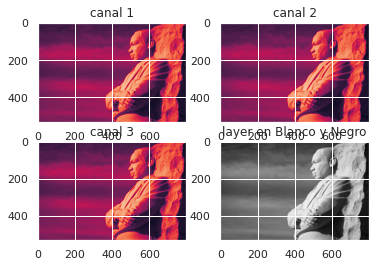

tamaño imagen 1 layer= (531, 800)


In [ ]:

## Leemos la imagen como un numpy array
kk = plt.imread('king.jpg')
print("tamaño de la imagen=", kk.shape)

#ch1
plt.subplot(221)
plt.title('canal 1')
plt.imshow(kk[:,:,0])

#ch2
plt.subplot(222)
plt.title('canal 2')
plt.imshow(kk[:,:,1])

#ch3
plt.subplot(223)
plt.title('canal 3')
plt.imshow(kk[:,:,2])

#ploteados son todos lo mismo :s

#ch_en_BlancoyNegro
plt.subplot(224)
plt.title('layer en Blanco y Negro')
plt.imshow(kk[:,:,0], cmap=plt.cm.Greys_r)
plt.show()

## Finalmente, nos quedamos con una unica dimensión
matriz = kk[:,:,0]
print("tamaño imagen 1 layer=", matriz.shape)

Cantidad de Componentes= 0


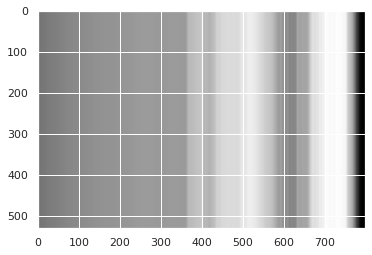

Cantidad de Componentes= 15


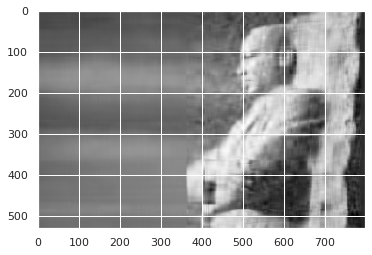

Cantidad de Componentes= 30


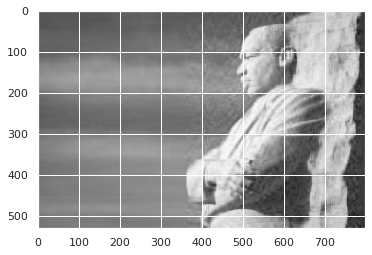

Cantidad de Componentes= 45


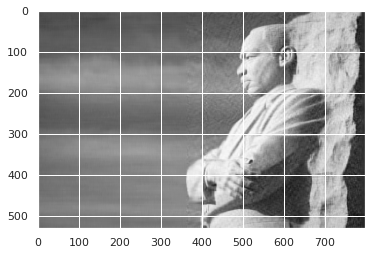

Cantidad de Componentes= 60


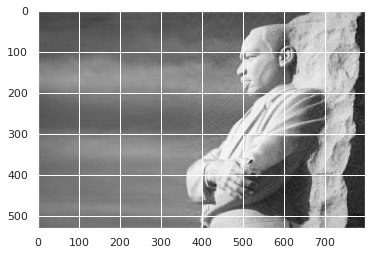

Cantidad de Componentes= 75


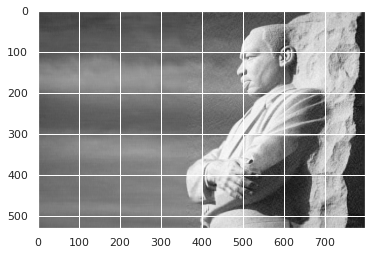

Cantidad de Componentes= 90


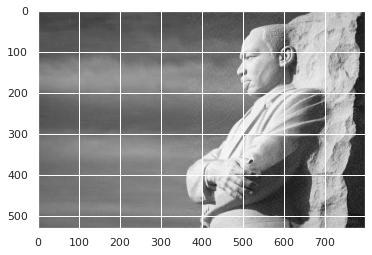

In [ ]:
#usar PCA
for i in range(0,100,15): #range(start, stop, step)
    print("Cantidad de Componentes=", i)
    pca = PCA(n_components = i)
    kk = pca.fit_transform(matriz) #aplicamos pca, eso es todo ;)

    #mostrar lo obtenido
    plt.imshow(pca.inverse_transform(kk), cmap=plt.cm.Greys_r) 
    plt.show()

Varianza "explicada" de cada una de las componentes principales y la varianza acumulada 

varianza (531,)
varianza acumulada (531,)


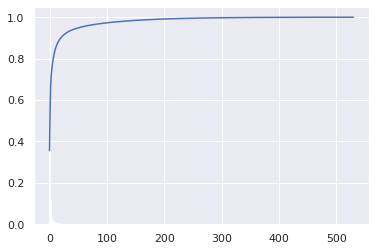

In [ ]:
#Instanciamos objeto PCA - tamaño de mi imagen: (531, 800)

pca = PCA() # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(matriz) # obtener los componentes principales
varianza = pca.explained_variance_ratio_ #returns a vector of the variance explained by each dimension
print("varianza", varianza.shape)

var_acum= np.cumsum(varianza) #lo mismo pero acumulada hasta la i-esima varianza
print("varianza acumulada", var_acum.shape)

plt.bar(range(len(varianza)), varianza) #size de la grafica de [0,531], puntos de la varianza
plt.plot(range(len(varianza)), var_acum) #ploteo de [0,531], varianza acumulada
plt.show()


Con unas 30, 35 componentes principales se tendría una varianza acumulada en torno al 90% mientras que el 99% se superaría con menos de 180 componentes principales.



### Referencias:
- (3) PCA Explicado sencilo: https://www.cienciadedatos.net/documentos/35_principal_component_analysis

- (1) Python Data Science Handbook https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


- (2) Otra fuente de codigo que explica la varianza en pca en codigo: https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

- (4) Fuente de el codigo para imagenes https://pybonacci.org/2012/10/08/analisis-de-componentes-principales-con-python/

# Seccion Final: reconocimiento facial (ejemplo "pedagogico") (PCA + SVM + SGD en un codigo)

Reconocimento facial: importamos datos disponibles de los presidentes desde la propia libreria de skilearn.

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Mostramos algunas de las imagenes de rostros que usaremos.

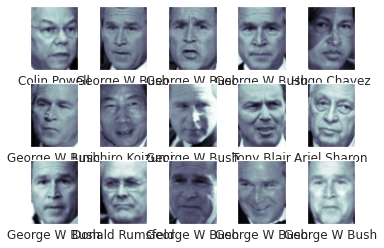

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Tamano de imagenes: 62x47.
Extraeremos informacion relevante usando PCA.

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA #cuidado aqui, libreria muy nueva

from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Subdivision de datos en datos para entrenar(training) y prueba (testing).

In [ ]:
from sklearn.model_selection import train_test_split #cuidado aqui, otra libreria nueva
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)


Finalmente, podemos usar una grid search cross-validation para calcular combinaciones de parámetros. Aquí ajustaremos C (que controla el margen) y gamma (que controla el tamaño del núcleo de la función de base radial), y determinaremos el mejor modelo:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 18s, sys: 17.9 s, total: 1min 36s
Wall time: 1min 1s
{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

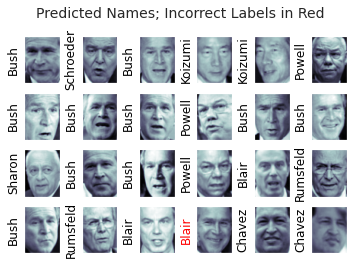

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


De esta pequeña muestra, nuestro estimador óptimo etiquetó erróneamente sólo una cara (la cara de Bush en la fila inferior fue mal etiquetada como Blair). Podemos tener una mejor idea del rendimiento de nuestro estimador usando el informe de clasificación, que enumera las estadísticas de recuperación etiqueta por etiqueta:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



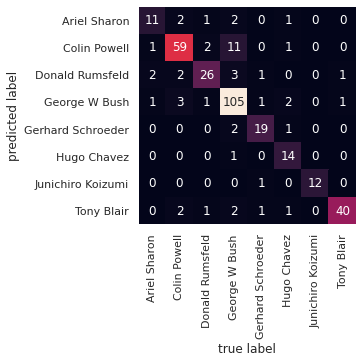

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Esto nos ayuda a tener una idea de qué etiquetas son susceptibles de ser confundidas por el estimador.

Para una tarea de reconocimiento facial en el mundo real, en la que las fotos no vienen pre-cortadas en bonitas cuadrículas, la única diferencia en el esquema de clasificación facial es la selección de rasgos: se necesitaría usar un algoritmo más sofisticado para encontrar los rostros, y extraer los rasgos que son independientes de la pixelación. Para este tipo de aplicación, una buena opción es hacer uso de OpenCV, que, entre otras cosas, incluye implementaciones pre-entrenadas de herramientas de extracción de características de última generación para imágenes en general y rostros en particular.


## Referencias:
- (1) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition 
- (2) Python Data Science Handbook: Essential Tools for Working with Data, 1nd Ed.
-(3) Deep Learning, Goodfellow
-(4) Pattern Recognition and Machine Learning, Bishop
- (5) Ejemplos del Lagrangiano: https://www.youtube.com/watch?v=gybFSod4_Eg&list=PL7r9KYBNn_RdcAsbbaa1gT4FCXWV9wrpD&index=6
-(6) Significado del Lagrangiano y los multiplicadores de Lagrange: https://www.youtube.com/watch?v=zA0Vr5YoYug&list=PL7r9KYBNn_RdcAsbbaa1gT4FCXWV9wrpD&index=7
-(7) The Matrix Calculus You Need For Deep Learning, Terence Parr and Jeremy Howard, 2018.
-(8) SVM Explicado sencillo: https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines
-(9) Underfiting, Overfiting: https://www.iartificial.net/analisis-de-errores-en-machine-learning/
-(10) Codigo para el rconocimiento facial de rostros: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- (11) In Depth: Parameter tuning for SVC: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769